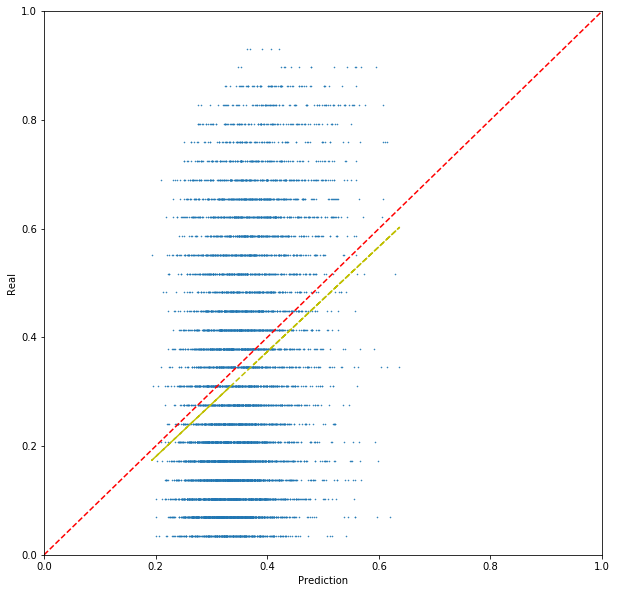

array([[1.        , 0.27074551],
       [0.27074551, 1.        ]])

In [111]:
import csv
import matplotlib.pyplot as plt
import math
from scipy import stats
import numpy as np

file = open('samples6.txt')

rdr = csv.reader(file, delimiter='\t')
r = list(rdr)

x = []
y = []

#for i in r:
#    x.append(math.sqrt((i[0])))
#    y.append(math.sqrt((i[1])))


for i in r:
    x.append(float(i[0]))
    y.append(float(i[1]))
    
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
ax.scatter(x, y, s=0.3)
plt.xlabel("Prediction")
plt.ylabel("Real")
ax.plot((0,1), 'r--')

ax.plot(x, np.poly1d(np.polyfit(x,y,1))(x), 'y--')

plt.show()
np.corrcoef(x,y)

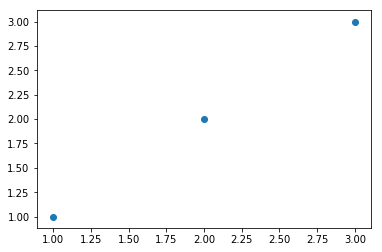

In [110]:
plt.scatter([1,2,3],[1,2,3])
plt.show()

In [11]:
all_gene_disease = pd.read_csv("all_gene_disease_associations.tsv", sep='\t').dropna()

In [ ]:
gene_disease_arry = np.array(all_gene_disease[['geneId','diseaseClass']]).tolist()
geneid_disease_dict = dict()

i = 0
while True:
    if i > len(gene_disease_arry) - 1:
        break
    if ';' in gene_disease_arry[i][1]:
        gene_disease_arry[i][1] = gene_disease_arry[i][1].split(';')
    else:
        gene_disease_arry[i][1] = [gene_disease_arry[i][1]]
    i += 1

i = 0
while True:
    if i + 1 > len(gene_disease_arry) - 1:
        break
    if gene_disease_arry[i][0] == gene_disease_arry[i+1][0]:
        gene_disease_arry[i][1] = gene_disease_arry[i][1] + gene_disease_arry[i+1][1]
        gene_disease_arry.pop(i+1)
    else:
        i += 1

disease_list = []
for i in gene_disease_arry:
    i[1] = list(set(i[1]))
    disease_list += list(set(i[1]))
disease_list = list(set(disease_list))

disease_list
gene_disease_arry

In [39]:
gene_features = []
for i in range(len(gene_disease_arry)):
    disease_one_hot = [ 0 for x in range(len(disease_list))]
    for j in range(len(disease_list)):
        if disease_list[j] in gene_disease_arry[i][1]:
            disease_one_hot[j] = 1
    gene_features.append((gene_disease_arry[i][0],disease_one_hot))
    
    

In [46]:
pd.DataFrame(gene_features, columns=['geneId', 'diseases']).to_csv("geneid_disease.csv")

In [47]:
len(disease_list)

29

In [48]:
len(gene_disease_arry)

14684

In [52]:
dict(zip(range(3),[4,5,6]))

{0: 4, 1: 5, 2: 6}